In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results,
                            how='inner', on='Mouse ID')

# Display the data table for preview
combined_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [39]:
# Checking the number of mice.
mice_count = combined_data_df["Mouse ID"].unique()
len(mice_count)

249

In [40]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_timepoint = combined_data_df.loc[combined_data_df.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
duplicate_mice_timepoint

array(['g989'], dtype=object)

In [41]:
# Optional: Get all the data for the duplicate mouse ID. 
special_mouse = combined_data_df.loc[combined_data_df["Mouse ID"] == 'g989']
special_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [42]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data_df2 = combined_data_df[combined_data_df["Mouse ID"].isin(duplicate_mice_timepoint)==False]
combined_data_df2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [43]:
# Checking the number of mice in the clean DataFrame.
mice_count2 = combined_data_df2["Mouse ID"].unique()
len(mice_count2)

248

In [44]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
average_tumor = combined_data_df2.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]

median_tumor = combined_data_df2.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]

variance_tumor = combined_data_df2.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]

standard_deviation_tumor = combined_data_df2.groupby("Drug Regimen").std(ddof=1)["Tumor Volume (mm3)"]

SEM_tumor = combined_data_df2.groupby("Drug Regimen").sem(ddof=1)["Tumor Volume (mm3)"]


# This method is the most straighforward, creating multiple series and putting them all together at the end.

In [47]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_tumor = pd.DataFrame({"Mean": average_tumor, "Median": median_tumor, "Variance": variance_tumor,
                                      "Standard Deviation": standard_deviation_tumor, "SEM": SEM_tumor})
summary_tumor

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


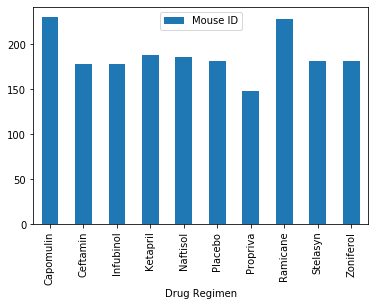

In [82]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
bar_df = pd.DataFrame(combined_data_df2.groupby(["Drug Regimen"]).count()).reset_index()

drug_regimen_data = bar_df[["Drug Regimen", "Mouse ID"]]

drug_regimen_data = drug_regimen_data.set_index("Drug Regimen")

drug_regimen_data.plot(kind = "bar")

plt.show()


<BarContainer object of 10 artists>

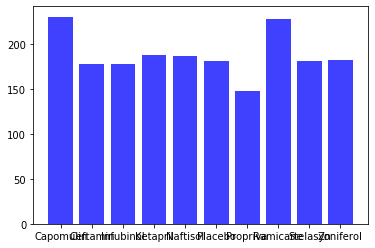

In [142]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = summary_tumor.index.unique()
y_axis = (combined_data_df2.groupby(["Drug Regimen"])["Mouse ID"].count())

plt.figure()
plt.bar(x_axis, y_axis, color='b', alpha=0.75, align="center")